In [29]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline
import datetime # fechas y horas
import re # texto
import string # texto2
import matplotlib.pyplot as plt # graficar
import seaborn as sns # graficar2
import io

from sklearn.feature_extraction.text import CountVectorizer # NLP
from wordcloud import WordCloud
import emoji  

pd.set_option('display.max_rows', 500)

In [10]:
path = 'tablac.csv'
df = pd.read_csv(path, sep=',', encoding='utf8', engine='python')

In [12]:
df.head(5)

,fecha,hora,mensaje,persona
0,2019-03-08,13:14:00,XD,x1
1,2019-03-08,13:15:00,Quien es Kike y quien ea Lalo?,x2
2,2019-03-08,13:15:00,🤔,x2
3,2019-03-08,13:16:00,<Multimedia omitido>,x3
4,2019-03-08,13:17:00,Va jeje,x2


In [13]:
df_copy = df.copy()

In [15]:
df_copy.shape

(7147, 4)

In [16]:
df_copy.shape[0]

7147

In [18]:
df_copy.shape[1]

4

In [19]:
df_copy.columns

Index([u'fecha', u'hora', u'mensaje', u'persona'], dtype='object')

In [21]:
list(df_copy.columns)

[u'fecha', u'hora', u'mensaje', u'persona']

In [23]:
df_copy['persona'].value_counts()

x5     1467
x4     1287
x8     1069
x2      911
x6      651
x7      641
x9      393
x1      311
x11     242
x10     147
x3       28
Name: persona, dtype: int64

In [26]:
df_copy['fecha'].unique()

array([u'2019-03-08', u'2019-03-12', u'2019-03-13', u'2019-03-14',
       u'2019-03-19', u'2019-03-20', u'2019-03-22', u'2019-03-25',
       u'2019-03-27', u'2019-03-28', u'2019-03-29', u'2019-04-02',
       u'2019-04-03', u'2019-04-04', u'2019-04-05', u'2019-04-08',
       u'2019-04-09', u'2019-04-10', u'2019-04-11', u'2019-04-12',
       u'2019-04-15', u'2019-04-16', u'2019-04-17', u'2019-04-22',
       u'2019-04-23', u'2019-04-24', u'2019-04-25', u'2019-04-26',
       u'2019-04-29', u'2019-04-30', u'2019-05-01', u'2019-05-02',
       u'2019-05-03', u'2019-05-06', u'2019-05-07', u'2019-05-08',
       u'2019-05-09', u'2019-05-10', u'2019-05-13', u'2019-05-14',
       u'2019-05-15', u'2019-05-16', u'2019-05-19', u'2019-05-20',
       u'2019-05-21', u'2019-05-23', u'2019-05-24', u'2019-05-27',
       u'2019-05-28', u'2019-05-29', u'2019-05-30', u'2019-05-31',
       u'2019-06-03', u'2019-06-04', u'2019-06-05', u'2019-06-06',
       u'2019-06-07', u'2019-06-10', u'2019-06-11', u'2019-06-

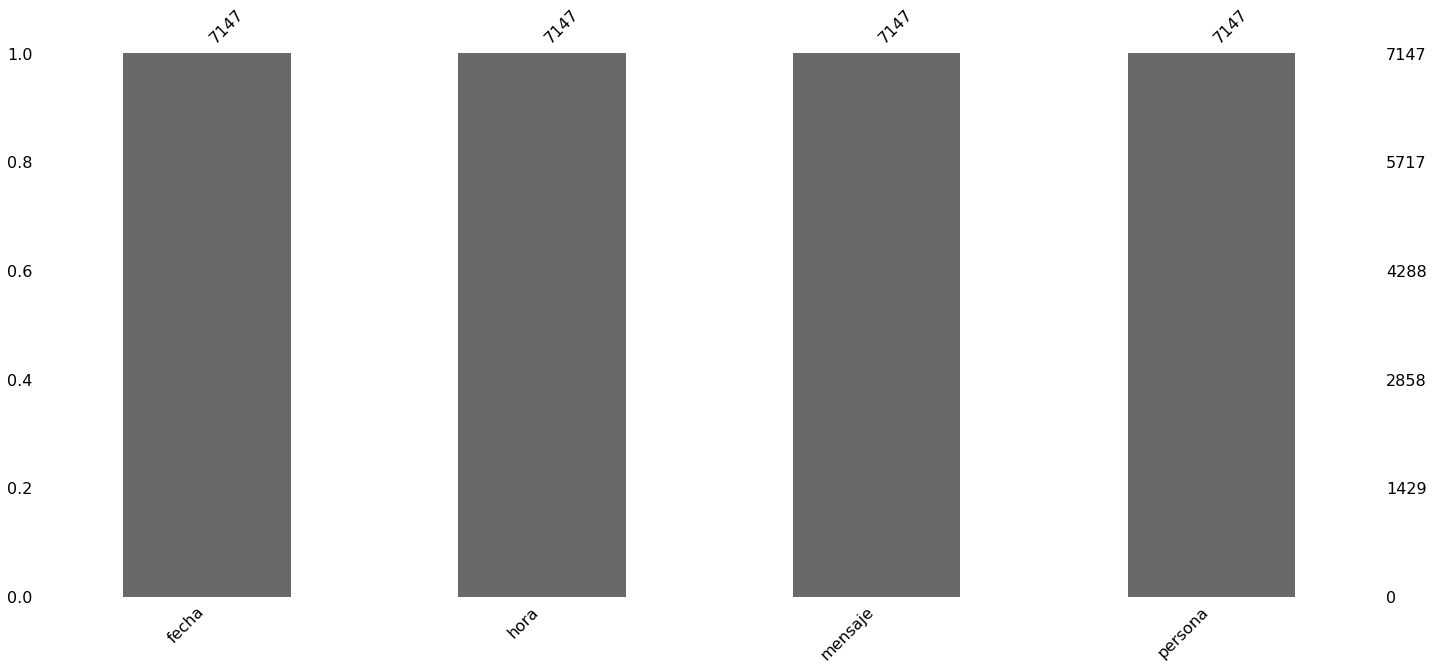

In [28]:
msno.bar(df_copy)

In [34]:
cont = 0
dict_time = {}
for hour in range(0, 24):
    for minute in range(0, 60):
        cont += 1
        dict_time[datetime.time(hour, minute)] = cont
        #print(cont, '\t', hour, ':', minute)

In [35]:
df_copy['lab_minutes'] = df_copy['hora'].map(dict_time).copy()

In [36]:
df_copy.head()

,fecha,hora,mensaje,persona,lab_minutes
0,2019-03-08,13:14:00,XD,x1,NaN
1,2019-03-08,13:15:00,Quien es Kike y quien ea Lalo?,x2,NaN
2,2019-03-08,13:15:00,🤔,x2,NaN
3,2019-03-08,13:16:00,<Multimedia omitido>,x3,NaN
4,2019-03-08,13:17:00,Va jeje,x2,NaN
